In [1]:
!pip install spacy

In [2]:
!pip install newsapi-python

In [6]:
!python -m spacy download en_core_web_lg
nlp_eng = en_code_web_lg.load()
newsapi = NewsApiClient (api_key='PLACE_HERE_YOUR_API_KEY')

[+] Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


NameError: name 'en_code_web_lg' is not defined

In [11]:
import spacy
from newsapi import NewsApiClient

nlp_eng = spacy.load('en_core_web_lg')
newsapi = NewsApiClient (api_key = 'PLACE_HERE_YOUR_API_KEY')

In [14]:
def getSomething(x):
    temp = newsapi.get_everything(q='coronavirus', language='en', from_param='2020-09-30', to='2020-10-30', sort_by='relevancy', page=x)
    return temp


articles = list(map(getSomething, range(1,6)))

In [16]:
import pickle
filename = 'articlesCOVID.pckl'
pickle.dump(articles, open(filename, 'wb'))
filename = 'articlesCOVID.pckl'
loaded_model = pickle.load(open(filename, 'rb'))
filepath = 'C:/Users/grand/Jupyter Notebooks/articlesCOVID.pckl'
pickle.dump(loaded_model, open(filepath, 'wb'))

In [25]:
import pandas as pd
dados = []
for i, article in enumerate(articles):
    for x in article['articles']:
        title = x['title']
        date = x['publishedAt']
        description = x['description']
        content = x['content']
        dados.append({'title':title[0], 'date':date[0], 'desc':description[0], 'content':content})
df = pd.DataFrame(dados)
df = df.dropna()
df.head()

,title,date,desc,content
0,S,2,M,Mouthwash is designed to kill germs in your mo...
1,C,2,N,Navigating air travel during the COVID-19 pand...
2,T,2,T,The tweet violated the platforms rules against...
3,C,2,A,The coronavirus pandemic is already shaping ho...
4,C,2,W,Many leaders most notably President Trump have...


In [88]:
from collections import Counter
from string import punctuation

def get_keywords_eng(text): 
    result = []
    pos_tag = ['PROPN', 'VERB', 'NOUN']
    doc = nlp_eng(text.lower())
    for token in doc:
        if (token.text in nlp_eng.Defaults.stop_words or token.text in punctuation):
              continue
        if (token.pos_ in pos_tag):
              result.append(token.text)
    return result

results = []
for content in df.content.values:
    results.append([('#' + x[0]) for x in Counter(get_keywords_eng(content)).most_common(5)])


df['keywords'] = results

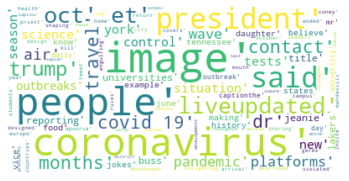

In [92]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
text = str(results)
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [91]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [95]:
df.to_csv(r'C:/Users/grand/Jupyter Notebooks/Covid.csv')